# Plot showing datasets stored in the Copernicus CDS by prduct type

In [19]:
import pandas as pd
from io import StringIO 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

numbers extracted from https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset, see tab product type

In [20]:
c3scds_datasets="""
Product type, number of datasets
Climate indices,4
Climate projections,28
External services,1
In-situ observations,5
Reanalysis,34
Satellite observations,31
Seasonal forecasts,8"""

In [21]:
df = pd.read_csv(StringIO(c3scds_datasets), sep = ',|\|', engine='python', index_col=0)
df

,number of datasets
Product type,
Climate indices,4
Climate projections,28
External services,1
In-situ observations,5
Reanalysis,34
Satellite observations,31
Seasonal forecasts,8


In [22]:
df2 = df.sort_values(by=df.columns[0], ascending=False)

In [23]:
df2.append(df2.sum().rename('Total'))

,number of datasets
Product type,
Reanalysis,34
Satellite observations,31
Climate projections,28
Seasonal forecasts,8
In-situ observations,5
Climate indices,4
External services,1
Total,111


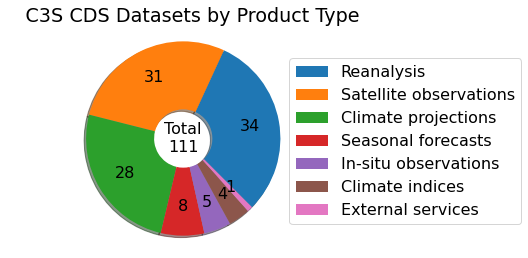

In [24]:
import matplotlib.pyplot as plt
import numpy as np

#== Pie chart, where the slices will be ordered and plotted counter-clockwise:
df2.index.tolist()
lbls = df2.index.tolist()
sizes = df2.iloc[:,0].tolist()

#== Return total number per class for pie-plot labelling
class MyClass:
    i = 0
def func(pct, vals):
    MyClass.i += -1
    # Returns absolute value against the default percentage
    absolute = (pct/100.*np.sum(vals))
    # Combine labels and values
    return "{:.0f}".format(absolute)

fontsize=16
fig1, ax1 = plt.subplots()

#== Pie wedgeprops with width being the donut thickness
patches, texts, autotexts = ax1.pie(sizes, wedgeprops=dict(width=0.7), 
        autopct=lambda pct: func(pct, sizes), 
        shadow=True, startangle=-45, labels=None,
        textprops={'fontsize': fontsize},
       pctdistance=0.7, labeldistance=1.05)
#texts[-1]._color = 'blue'
#autotexts[-1]._x = -0.8
sumstr = 'Total\n'+str(np.sum(sizes))

plt.legend(patches, lbls,bbox_to_anchor=(1.05,0.48), loc="center right", fontsize=fontsize, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.5)

#== String on the donut center
ax1.text(0., 0., sumstr, horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
#== Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

ax1.set_title("   C3S CDS Datasets by Product Type", fontsize=1.2*fontsize,  pad=0, ha='center')
plt.show()
